# Baseline Model
## Topic Modeling LDA

In [1]:
import preprocess
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import joblib

In [2]:
data = preprocess.read_encrypted_data()
df = preprocess.reformat_data(data)

In [3]:
# vectorizer = TfidfVectorizer(lowercase = True, min_df = 10, max_df = 0.2, ngram_range=(1, 4), stop_words="english")
vectorizer = CountVectorizer(lowercase = True, min_df = 10, max_df = 0.2, stop_words="english", ngram_range=(1, 4))
Text_X = vectorizer.fit_transform(df["Event_Remarks_Text"])

In [4]:
lda = LatentDirichletAllocation(n_components=30, max_iter=100, learning_method='online', 
                                random_state=0, verbose=2, evaluate_every=1)

theta = lda.fit_transform(Text_X.A)

iteration: 1 of max_iter: 100, perplexity: 2140.9944
iteration: 2 of max_iter: 100, perplexity: 2012.8400
iteration: 3 of max_iter: 100, perplexity: 1981.2076
iteration: 4 of max_iter: 100, perplexity: 1966.9138
iteration: 5 of max_iter: 100, perplexity: 1958.5146
iteration: 6 of max_iter: 100, perplexity: 1953.3350
iteration: 7 of max_iter: 100, perplexity: 1949.7427
iteration: 8 of max_iter: 100, perplexity: 1947.2854
iteration: 9 of max_iter: 100, perplexity: 1945.2692
iteration: 10 of max_iter: 100, perplexity: 1943.7262
iteration: 11 of max_iter: 100, perplexity: 1942.4969
iteration: 12 of max_iter: 100, perplexity: 1941.4619
iteration: 13 of max_iter: 100, perplexity: 1940.6042
iteration: 14 of max_iter: 100, perplexity: 1939.9160
iteration: 15 of max_iter: 100, perplexity: 1939.3287
iteration: 16 of max_iter: 100, perplexity: 1938.8293
iteration: 17 of max_iter: 100, perplexity: 1938.3553
iteration: 18 of max_iter: 100, perplexity: 1937.8741
iteration: 19 of max_iter: 100, perpl

In [5]:
beta = lda.components_/np.sum(lda.components_,axis=1,keepdims=True)
max_words = np.argsort(-beta, axis=1)[:,:15]
features = vectorizer.get_feature_names_out()

for i in range(lda.components_.shape[0]):
    print(f"topic: {i}")
    print(f"psuedo count: {lda.components_[i].sum()}")
    print([features[ind] for ind in max_words[i] if lda.components_[i, ind] >= 5])
    print('\n')

topic: 0
psuedo count: 81422.51884185254
['2023', 'changed', 'miscellaneous', '03', 'type', 'priority', 'changed 2023', 'event priority changed', 'event priority', 'priority changed 2023', 'priority changed', 'event priority changed 2023', '02', 'event type', 'type changed']


topic: 1
psuedo count: 67968.4693028694
['domestic', 'disturbance', 'domestic disturbance', 'verbal', '1011', 'verbal domestic', 'verbal domestic disturbance', 'changed', 'involved', 'event type changed domestic', 'changed domestic', 'type changed domestic', 'offr', 'domestic domestic', '2023']


topic: 2
psuedo count: 60405.28782827542
['vehicle', 'past', 'incident', '2023', 'caller scene', 'scene', 'miscellaneous', 'incident happened', 'happened past', 'incident happened past', 'type', 'vehicle area', 'suspect person vehicle area', 'person vehicle', 'person vehicle area']


topic: 3
psuedo count: 21883.56605852339
['2023 03', '10', 'redacted redacted redacted', 'vic', 'hospital', 'form', '2023', 'social', 'rest

## Number of topic fine tuning

In [6]:
# the range of topic numbers to test
topic_numbers = range(2, 21, 1)

# Fit LDA models and compute perplexity
perplexities = []
best_lda = None
best_theta = None
best_perplexity = np.inf

for n in topic_numbers:
    lda = LatentDirichletAllocation(n_components=n, max_iter=100, learning_method='online', 
                                    random_state=0, evaluate_every=1)
    theta = lda.fit_transform(Text_X.A)
    perplexities.append(lda.perplexity(Text_X))
    print(f"Number of topics: {n}, Perplexity: {lda.perplexity(Text_X)}")
    
    # pocket the best lda
    if lda.perplexity(Text_X) < best_perplexity:
        best_lda = lda
        best_theta = theta
        best_perplexity = lda.perplexity(Text_X)

Number of topics: 2, Perplexity: 2942.734735005
Number of topics: 3, Perplexity: 2601.44863803876
Number of topics: 4, Perplexity: 2545.9083069685958
Number of topics: 5, Perplexity: 2234.440320588062
Number of topics: 6, Perplexity: 2186.0165593679417
Number of topics: 7, Perplexity: 2133.6526223656856
Number of topics: 8, Perplexity: 2103.5475190801994
Number of topics: 9, Perplexity: 2108.8209278747527
Number of topics: 10, Perplexity: 2097.455626529739
Number of topics: 11, Perplexity: 2041.277066641741
Number of topics: 12, Perplexity: 2017.3704200985176
Number of topics: 13, Perplexity: 2072.9716176476313
Number of topics: 14, Perplexity: 2062.8009363957012
Number of topics: 15, Perplexity: 2027.2800234721838
Number of topics: 16, Perplexity: 1968.5511740920956
Number of topics: 17, Perplexity: 1951.4626619632656
Number of topics: 18, Perplexity: 1948.6721917969528
Number of topics: 19, Perplexity: 1948.0968288710374
Number of topics: 20, Perplexity: 1969.728994885199


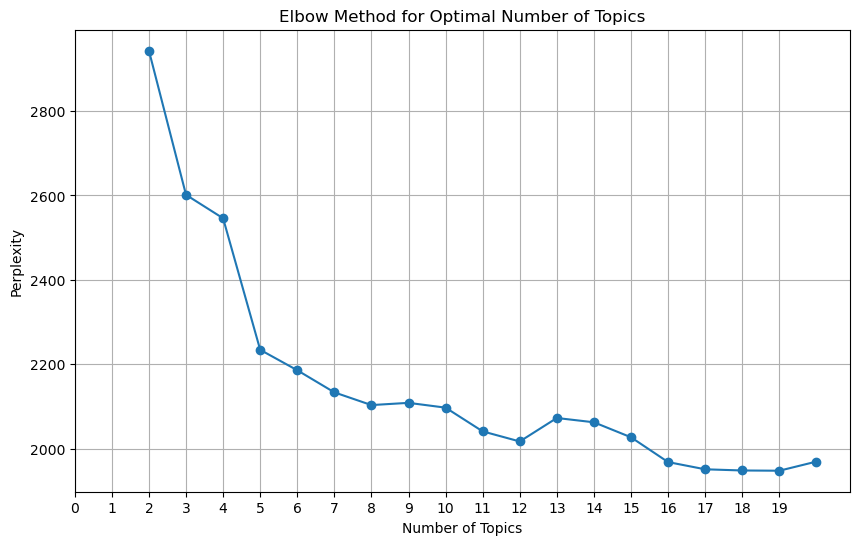

In [7]:
# Visualize the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(topic_numbers, perplexities, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(np.arange(0, 20, step=1))
plt.title('Elbow Method for Optimal Number of Topics')
plt.grid()
plt.show()

In [8]:
beta = best_lda.components_/np.sum(best_lda.components_,axis=1,keepdims=True)
max_words = np.argsort(-beta, axis=1)[:,:15]
features = vectorizer.get_feature_names_out()

for i in range(best_lda.components_.shape[0]):
    print(f"topic: {i}")
    print(f"psuedo count: {best_lda.components_[i].sum()}")
    print([features[ind] for ind in max_words[i] if best_lda.components_[i, ind] >= 5])
    print('\n')

topic: 0
psuedo count: 68797.03109046476
['suspect', 'incident', 'scene', 'theft', 'known', 'miscellaneous', 'caller scene', 'type', '2023', 'changed', 'cad', 'level', 'chief complaint', 'determinant level', 'determinant']


topic: 1
psuedo count: 66891.79020429042
['domestic', 'disturbance', 'past', 'domestic disturbance', 'incident', '2023', 'miscellaneous', 'verbal', '1011', 'changed', '2023 02', 'ex', 'sentry', 'caller scene', 'offr']


topic: 2
psuedo count: 33400.132758265536
['scene', 'caller scene', 'chief', 'party', 'incident', 'complaint', 'chief complaint', 'party caller', 'problem', 'party caller scene', 'person', '2nd', '2nd party', '2nd party caller', '2nd party caller scene']


topic: 3
psuedo count: 35071.310364204575
['access', 'area', 'access area', 'advised event special', 'advised event special address', 'event special address comment', 'event special', 'accept advised event special', 'event special address', 'cards', 'allow', 'certain', 'restricted', 'allow access'

# Dump the best model

In [9]:
# joblib.dump(best_theta, "data/best_theta.jl")
# joblib.dump(best_lda, "data/best_lda.jl")

In [10]:
# lda = joblib.load("data/best_lda.jl")
# theta = joblib.load("data/best_theta.jl")

# Pick appropriate topic labels

In [36]:
topic_dict = {"disturbance":0, "access area":1, "report contact": 2, "advised event":3, "miscellaneous":4, "vehicle":5, "number floors":6,
             "event type changed":7, "non urgent request":8}

for topic, topic_id in topic_dict.items():
    print(f"topic: {topic}")
    print(f"psuedo count: {best_lda.components_[topic_id].sum()}")
    print([features[ind] for ind in max_words[topic_id] if best_lda.components_[topic_id, ind] >= 5])
    print('\n')

topic: disturbance
psuedo count: 7664.575701409167
['domestic', 'disturbance', 'verbal', 'domestic disturbance', 'changed', 'involved', 'incident', 'miscellaneous', 'scene', 'ex', 'suspect', 'sentry', 'caller scene', 'verbal domestic', 'verbal domestic disturbance']


topic: access area
psuedo count: 2157.4526345576523
['access', 'area', 'access area', 'allow', 'cards', 'certain', 'event special', 'advised event special', 'event special address comment', 'advised event special address', 'event special address', 'accept advised event special', 'certain access', 'address comment restricted', 'access cards allow access']


topic: report contact
psuedo count: 10305.656740739483
['eco', 'said', 'comp', 'phone', 'number', 'stated', 'calling', 'says', 'officer', 'wanted', 'report', 'contact', 'just', 'wants', 'time']


topic: advised event
psuedo count: 767.4515850685127
['accept advised event special', 'advised event special address', 'event special address comment', 'event special', 'advise

# Document retreival by topic

In [37]:
from scipy.stats import zscore

def get_top_docs_by_topic(topic_list, n_docs):
    MIN_Z_SCORE = 2
    
    topic_set = set([topic_dict[t] for t in topic_list])
    matches = []  # (min() of zscores, post)

    for id, text, doc_vector in zip(df["Event_Anonymizer"], df["Event_Remarks_Text"], best_theta):
        
        zscores = zscore(doc_vector, axis=0)
        
        top_topics = np.where(zscores >= MIN_Z_SCORE)[0]
        
        if topic_set.issubset(set(top_topics)):
            matches.append((id, text, min(zscores[list(topic_set)])))
        
    matches.sort(reverse=True,key=lambda x: np.min(x[2]))

    return len(matches), [match[0] for match in matches[:n_docs]], [match[1] for match in matches[:n_docs]]

In [47]:
get_top_docs_by_topic(['report contact'], 5)

(284,
 [202423006704, 202423002551, 202423002132, 202423010338, 202423008122],
 ['9716',
  "THE SYSTEM HAS SABATOGED HIS LIFE FOR 10 YRS AND HE IS DISTURBED TO KNOW THAT THE SYSTEM IS METHODICALLY MAKING PEOPLE NUTS\nBECAUSE OF THAT TREATMENT HE NOW HAS PTSD\nHE IS LOUD AND AIGTATED TONIGHT FROM THE GET-GO\nNUMEROUS PEOPLE BEHIND THE SCENES HAVE BEEN RUINING HIS LIFE\nCO DID NOT IDENTIFY HIMSELF - ECO RECOGNIZES HIS [Redacted] AND STORY\nJUST ASKED IF IT'S [Redacted] AND HE SAID YES AND CHALLENGED ECO - ARE YOU GOING TO GIVE UP AND [Redacted] UP ON ME\nTHEN ASKED IF ECO IS GOING TO [Redacted] TO [Redacted] HIM 211\nHE IS OUTSIDE WALKING AROUND BECAUSE HE SAID HE CAN'T SLEEP BECAUSE HIS PTSD IS OUT OF CONTROL TONIGHT\nASKED HIM IF SOMETHING SPECIFIC HAPPENED AND WHAT HE'S DOING TONIGHT - HE CALMED MOMENTARILY, SAID SORRY FOR YELLING AND SAID HE'S OUT WALKING AND THEN WENT BACK INTO HIS STORY\nHE HAS WORKED HIMSELF INTO A STATE WHERE HE IS NOW SCREAMING AS LOUD AS HE CAN AND NOT RESPONDI